In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split



#SVMs
from sklearn.svm import SVC

from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score


In [2]:
snp500=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table1 = snp500[0]
symbols = table1["Symbol"]

Tickers = []
n = 0
for l in symbols:
    Tickers.append(symbols[n])
    n += 1
Tickers.remove("BRK.B")
Tickers.remove("BF.B")
Tickers.remove("VNO")
Tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [3]:
#5 different tickers: Microsoft, BP, Disney, Lockheed Martin, and bitcoin.
AccuracyData = []
for tick in Tickers:
    stock = yf.download([tick],period = "5y")
    
    print(tick)

    Open = stock["Open"]
    CHANGE = np.array([])
    
    for i in range(0,len(Open)-1):    
        if Open[i]<Open[i+1]:
            CHANGE = np.append(CHANGE, 1)
        else:
            CHANGE = np.append(CHANGE, 0)    
    CHANGE = np.append(CHANGE, "NaN")
    stock["Change"] = CHANGE
    stock = stock[:-1]
        
    features = ["Open","Low","High","Close"]

    ratio = round(0.8*stock.shape[0])
    X = stock[features]
    Y = stock["Change"]

    X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=ratio)
        #print(X_train.shape, y_train.shape)
    model=SVC(kernel="linear",C=100,random_state = 42069)
    svmfit = model.fit(X_train,y_train)

    y_preds = svmfit.predict(X_test)
    Accuracy = accuracy_score(y_test,y_preds)
    print('The accuracy of the model is: {:.2f}'.format(accuracy_score(y_test, y_preds)*100),"%")
    #     print('The recall score for the dataset using SVM is',(recall_score(y_test,y_preds,pos_label="1.0")*100),'%')
    #     print('The precision percent value for the dataset using SVM is',(precision_score(y_test,y_preds,pos_label="1.0")*100),'%')
    print('The f1 value for the model is: {:.2f}'.format(f1_score(y_test,y_preds,pos_label="1.0")*100),'%')

#     m_svm = metrics.confusion_matrix(y_preds,y_test)
#     lt.figure(figsize=(6,6))
#     sns.heatmap(cm_svm,annot=True,fmt="d",linewidths=.5,square=True,cmap="summer")
#     plt.ylabel("Actual label")
#     plt.xlabel("Predicted label")
#     all_sample_title=(tick,"Stock confusion matrix")
#     plt.title(all_sample_title,size=15)
#     plt.show()
    AccuracyData.append(Accuracy)

[*********************100%***********************]  1 of 1 completed
MMM
The accuracy of the model is: 84.52 %
The f1 value for the model is: 83.82 %
[*********************100%***********************]  1 of 1 completed
AOS
The accuracy of the model is: 87.70 %
The f1 value for the model is: 87.84 %
[*********************100%***********************]  1 of 1 completed
ABT
The accuracy of the model is: 84.92 %
The f1 value for the model is: 86.13 %
[*********************100%***********************]  1 of 1 completed
ABBV
The accuracy of the model is: 84.92 %
The f1 value for the model is: 85.16 %
[*********************100%***********************]  1 of 1 completed
ABMD
The accuracy of the model is: 86.11 %
The f1 value for the model is: 88.75 %
[*********************100%***********************]  1 of 1 completed
ACN
The accuracy of the model is: 82.54 %
The f1 value for the model is: 85.99 %
[*********************100%***********************]  1 of 1 completed
ATVI
The accuracy of the mode

In [ ]:
print(AccuracyData)

[0.8055555555555556, 0.8492063492063492, 0.8531746031746031, 0.8333333333333334, 0.8571428571428571, 0.8611111111111112, 0.8373015873015873, 0.8333333333333334, 0.8452380952380952, 0.8452380952380952, 0.8849206349206349, 0.8492063492063492, 0.8015873015873016, 0.8214285714285714, 0.8373015873015873, 0.8095238095238095, 0.8412698412698413, 0.8293650793650794, 0.8174603174603174, 0.8611111111111112, 0.8888888888888888, 0.8611111111111112, 0.8531746031746031, 0.876984126984127, 0.8690476190476191, 0.8293650793650794, 0.8253968253968254, 0.8531746031746031, 0.8412698412698413, 0.873015873015873, 0.8650793650793651, 0.8373015873015873, 0.8690476190476191, 0.7698412698412699, 0.8412698412698413, 0.8928571428571429, 0.7936507936507936, 0.8809523809523809, 0.8015873015873016, 0.8412698412698413, 0.8214285714285714, 0.8214285714285714, 0.8134920634920635, 0.8492063492063492, 0.8452380952380952, 0.8849206349206349, 0.8293650793650794, 0.8373015873015873, 0.7936507936507936, 0.876984126984127, 0.

Text(0.5, 1.0, 'Boxplot Of SNP500 Accuracy')

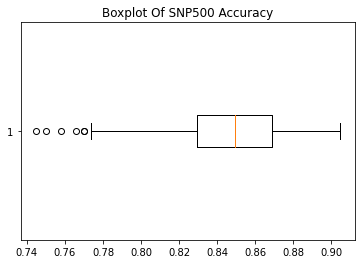

In [ ]:
plt.boxplot(AccuracyData,vert=False)
plt.title("Boxplot Of SNP500 Accuracy")

In [ ]:
from scipy.stats import norm

In [ ]:

sns.distplot(AccuracyData, hist=False)
plt.title("Distribution of Accuracies")

TypeError: unsupported operand type(s) for /: 'list' and 'int'

/home/chris/Project_dir/Project_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


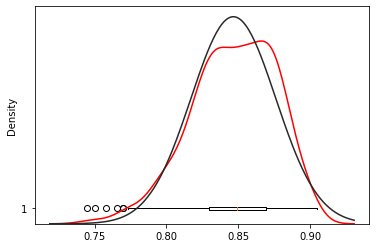

In [ ]:
plt.boxplot(AccuracyData,vert=False)
sns.distplot(AccuracyData, color = "red", hist=False, fit = norm)
plt.show()

In [ ]:
snp = yf.download("^GSPC",period = "5y")

[*********************100%***********************]  1 of 1 completed


In [ ]:
Open = snp["Open"]
CHANGE = np.array([])
    
for i in range(0,len(Open)-1):    
    if Open[i]<Open[i+1]:
        CHANGE = np.append(CHANGE, 1)
    else:
        CHANGE = np.append(CHANGE, 0)    
CHANGE = np.append(CHANGE, "NaN")
snp["Change"] = CHANGE
snp = snp[:-1]
        
features = ["Open","Low","High","Close"]

ratio = round(0.8*snp.shape[0])
X = snp[features]
Y = snp["Change"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=ratio)
model=SVC(kernel="linear",C=100,random_state = 42069)
svmfit = model.fit(X_train,y_train)

y_preds = svmfit.predict(X_test)
SNPACC = accuracy_score(y_test,y_preds)

In [ ]:
print(SNPACC)

0.8571428571428571


/home/chris/Project_dir/Project_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


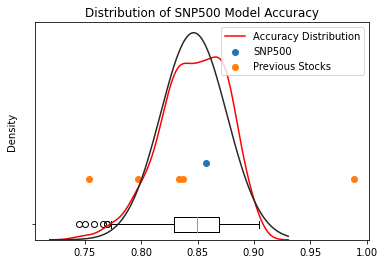

In [ ]:
prev = [0.8333,0.754,0.8373,0.7976,0.989]
prevy = [4,4,4,4,4]
plt.boxplot(AccuracyData,vert=False,widths = 1)
plt.scatter(SNPACC,5,label='SNP500')
plt.scatter(prev,prevy,label='Previous Stocks')
sns.distplot(AccuracyData, color = "red", hist=False, fit = norm,label='Accuracy Distribution')
plt.title("Distribution of SNP500 Model Accuracy")
plt.legend()
plt.yticks(color='w')
plt.show()

In [ ]:
print(min(AccuracyData))

0.7446808510638298


In [ ]:
n = 0
join = []
for k in range(len(Tickers)):
    join.append([Tickers[n],AccuracyData[n]])
    n = n + 1

IndexError: list index out of range

In [ ]:
print(join)

[['MMM', 0.8055555555555556], ['AOS', 0.8492063492063492], ['ABT', 0.8531746031746031], ['ABBV', 0.8333333333333334], ['ABMD', 0.8571428571428571], ['ACN', 0.8611111111111112], ['ATVI', 0.8373015873015873], ['ADM', 0.8333333333333334], ['ADBE', 0.8452380952380952], ['ADP', 0.8452380952380952], ['AAP', 0.8849206349206349], ['AES', 0.8492063492063492], ['AFL', 0.8015873015873016], ['A', 0.8214285714285714], ['AIG', 0.8373015873015873], ['APD', 0.8095238095238095], ['AKAM', 0.8412698412698413], ['ALK', 0.8293650793650794], ['ALB', 0.8174603174603174], ['ARE', 0.8611111111111112], ['ALGN', 0.8888888888888888], ['ALLE', 0.8611111111111112], ['LNT', 0.8531746031746031], ['ALL', 0.876984126984127], ['GOOGL', 0.8690476190476191], ['GOOG', 0.8293650793650794], ['MO', 0.8253968253968254], ['AMZN', 0.8531746031746031], ['AMCR', 0.8412698412698413], ['AMD', 0.873015873015873], ['AEE', 0.8650793650793651], ['AAL', 0.8373015873015873], ['AEP', 0.8690476190476191], ['AXP', 0.7698412698412699], ['AMT'